In [109]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.optimize import fsolve

from julia import KerrSolver

In [134]:
a = 0.9 #
q0 = [2.5, np.pi / 2, 0.] # pi/3 #
p0 = [0., -0.2, -2.] #
end_lambda = 10.
step_size = 0.0005
fac = 0.

# q0 = [4., np.pi / 3, 0.]
# p0 = [0., 0.767851, 2.]
# a = 0.99
# end_lambda = 1000.
# step_size = 0.0005
# fac = 1/2
# mu = 1.

# fac = 0.
# mu = 0.

# q0 = [4., 1.037, 0.] # ~pi/3
# p0 = [0., 0., 2.148]
# a = 0.9
# mu = 0.
# end_lambda=100.
# step_size=0.0005

# fac = 0.

In [135]:
# GENERAL EXPRESSION FOR ENERGY BY SOLVING guu.pd.pd = 0
def energy(E):
    return -((a ** 4 * (E ** 2 - 2 * p0[0] ** 2) - 8 * a * E * p0[2] * q0[0] - 
    2 * q0[0] * (p0[1] ** 2 * (-2 + q0[0]) + p0[0] ** 2 * (-2 + q0[0]) ** 2 * q0[0] - E ** 2 * q0[0] ** 3) + 
    a ** 2 * (2 * p0[2] ** 2 - 2 * p0[1] ** 2 - 4 * p0[0] ** 2 * (-2 + q0[0]) * q0[0] + 
    E ** 2 * q0[0] * (2 + 3 * q0[0])) + (a ** 2 + (-2 + q0[0]) * q0[0]) * (a ** 2 * E ** 2 * np.cos(2 * q0[1]) - 
    2 * p0[2] ** 2 * (1/(np.sin(q0[1]) ** 2)) ))/((a ** 2 + (-2 + q0[0]) * q0[0]) * (a ** 2 + 2 * q0[0] ** 2 + 
    a ** 2 * np.cos(2 * q0[1])))) + 2 * fac

E = fsolve(energy, 1.)[-1]
print(E)

params = [a, E, mu, fac]

0.1878809905821554


In [136]:
retcode, lambdas, vec = KerrSolver.solveSystem(q0, p0, params, end_lambda, step_size)

In [137]:
vec

array([[ 2.50000000e+00,  1.57079633e+00,  0.00000000e+00,
         0.00000000e+00, -2.00000000e-01, -2.00000000e+00],
       [ 2.49999999e+00,  1.57081233e+00,  6.42538075e-05,
         1.62347687e-04, -1.99999997e-01, -2.00000000e+00],
       [ 2.49999995e+00,  1.57082833e+00,  1.28507614e-04,
         3.24695391e-04, -1.99999990e-01, -2.00000000e+00],
       ...,
       [ 1.43899413e+00,  1.67062364e+00, -4.29699946e+00,
         8.07060003e+02,  1.99867420e-02, -2.00000000e+00],
       [ 1.43876167e+00,  1.67062151e+00, -4.37426011e+00,
         8.68744971e+02,  2.21150234e-02, -2.00007472e+00],
       [ 1.43876167e+00,  1.67062151e+00, -4.37426011e+00,
         8.68744971e+02,  2.21150234e-02, -2.00007472e+00]])

In [138]:
retcode

'Terminated'

In [139]:
type(retcode)

str

In [140]:
type(lambdas)

numpy.ndarray

In [141]:
type(vec)

numpy.ndarray

In [142]:
vec[:, 0]

array([2.5       , 2.49999999, 2.49999995, ..., 1.43899413, 1.43876167,
       1.43876167])

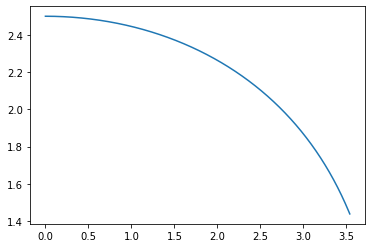

In [143]:
plt.plot(lambdas, vec[:, 0])

In [144]:
def sphToCart(r, th, ph):
    xs = r * np.sin(th) * np.cos(ph)
    ys = r * np.sin(th) * np.sin(ph)
    zs = r * np.cos(th)

    return xs, ys, zs

In [145]:
xc = list()
yc = list()
zc = list()

# Converting to Cartesian from Spherical Polar Coordinates
for y in vec:
    r, th, phi = y[0], y[1], y[2]
    xs, ys, zs = sphToCart(r, th, phi)
    xc.append(xs)
    yc.append(ys)
    zc.append(zs)

In [146]:
xc

[2.5,
 2.499999981141861,
 2.499999924567444,
 2.4999998302767485,
 2.4999996982697756,
 2.4999995285465246,
 2.499999321106997,
 2.4999990759511936,
 2.499998793079115,
 2.4999984724907627,
 2.499998114186138,
 2.4999977181652424,
 2.4999972844280776,
 2.499996812974646,
 2.4999963038049495,
 2.49999575691899,
 2.4999951723167695,
 2.499994549998292,
 2.4999938899635605,
 2.499993192212577,
 2.4999924567453453,
 2.499991683561868,
 2.49999087266215,
 2.4999900240461943,
 2.4999891377140053,
 2.4999882136655867,
 2.4999872519009427,
 2.4999862524200793,
 2.4999852152229995,
 2.49998414030971,
 2.4999830276802135,
 2.4999818773345175,
 2.4999806892726264,
 2.499979463494546,
 2.4999782000002826,
 2.4999768987898427,
 2.4999755598632314,
 2.499974183220455,
 2.4999727688615216,
 2.499971316786437,
 2.499969826995208,
 2.4999682994878425,
 2.4999667342643477,
 2.49996513132473,
 2.4999634906689994,
 2.499961812297162,
 2.499960096209226,
 2.4999583424052005,
 2.4999565508850936,
 2.499954

In [147]:
yc

[0.0,
 0.0001606345176991883,
 0.00032126902584273713,
 0.0004819035136710815,
 0.0006425379704246519,
 0.0008031723853438729,
 0.0009638067476691598,
 0.0011244410466409174,
 0.0012850752714995367,
 0.0014457094114853934,
 0.0016063434558388448,
 0.0017669773938002288,
 0.001927611214609859,
 0.0020882449075080266,
 0.002248878461734993,
 0.0024095118665309907,
 0.002570145111136221,
 0.0027307781847908516,
 0.002891411076735013,
 0.0030520437762087964,
 0.003212676272452251,
 0.0033733085547053843,
 0.0035339406122081585,
 0.0036945724342004865,
 0.003855204009922231,
 0.0040158353286132015,
 0.004176466379513152,
 0.004337097151861784,
 0.004497727634898731,
 0.004658357817863571,
 0.004818987689995817,
 0.004979617240534912,
 0.005140246458720236,
 0.00530087533379109,
 0.005461503854986706,
 0.005622132011546244,
 0.005782759792708778,
 0.005943387187713305,
 0.006104014185798738,
 0.00626464077620391,
 0.00642526694816756,
 0.006585892690928342,
 0.006746517993724816,
 0.00690714

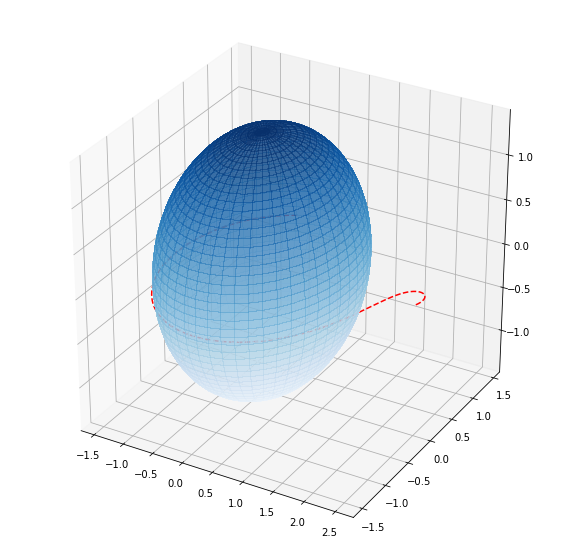

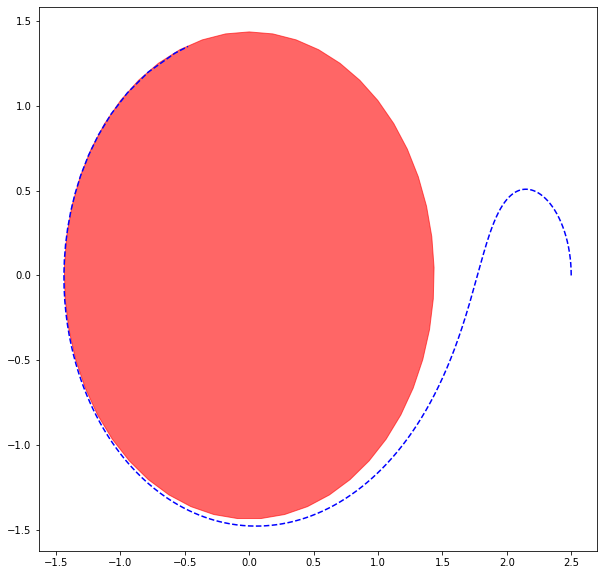

In [148]:
#####################################################################################
## Plotting BH
theta, phi = np.linspace(0, 2 * np.pi, 50), np.linspace(0, np.pi, 50)
THETA, PHI = np.meshgrid(theta, phi)

# Ergosphere
R_o = 1 + np.sqrt(1 - (a * np.cos(THETA) ** 2))

Xo = R_o * np.sin(PHI) * np.cos(THETA)
Yo = R_o * np.sin(PHI) * np.sin(THETA)
Zo = R_o * np.cos(PHI)

# Horizon
r_outer = 1 + np.sqrt(1 - a ** 2)

Xro = r_outer * np.sin(PHI) * np.cos(THETA)
Yro = r_outer * np.sin(PHI) * np.sin(THETA)
Zro = r_outer * np.cos(PHI)

fig, ax = plt.subplots(figsize=(10,10))
ax = plt.axes(projection="3d")
# ax.view_init(azim=45, elev=45)

ax.plot(xc, yc, zc, "r--")
ax.plot_surface(
    Xro, Yro, Zro, rstride=1, cstride=1, cmap=plt.get_cmap('Blues'),
    linewidth=0, antialiased=False, alpha=0.6)
#####################################################################################
# Plotting in 2D
Xho = r_outer * np.sin(theta)
Yho = r_outer * np.cos(theta)

fig2 = plt.figure(figsize=(10,10))
ax2 = plt.axes()
ax2.plot(xc, yc, 'b--')
ax2.fill(Xho, Yho, alpha=0.6, color="red")

#####################################################################################
# fig3 = plt.figure(figsize=(10,10))
# plt.plot(np.arange(200),result[2][:,0][:200])
# print(sol[:,0][:200])